# Peak detector: 2D scanning 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs


#Import python files. They have to be in the same folder as this notebook, if not you have to add the respective filepath.
import FFT_processing as fft
import Peaks_detector as pkd
import ImageTreatment_and_interfaces as ii

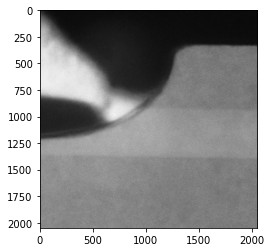

In [3]:
#Use the filepath of the sample you want to study
file_path = 'C:\\Users\\ipinto\\OneDrive - INSTITUT CATALÀ DE NANOCIENCIA I NANOTECNOLOGÍA\\PROGRAMMING\\dm3_Phases\\GeQW1.dm3'

#Charge the dm3 image
imgdm3 = hs.load(file_path)

#Convert the image in a numpy array
n_img = np.asarray(imgdm3)

#Plot the image in gray scale
plt.imshow(n_img, cmap = 'gray')
plt.show()

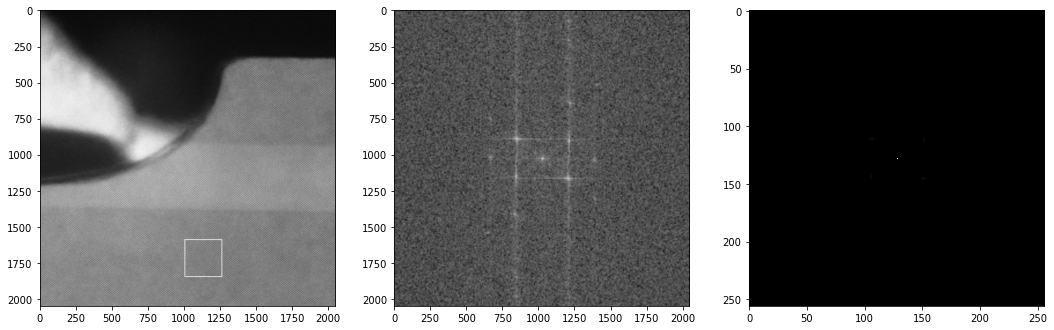

In [4]:
#Calculate experimental FFT using the filepath, the window size and the zone of this window
window_size = 256
zone = [1000, 200]

exp_fft = fft.experimental_fft(file_path, window_size = window_size, zone = zone) #By default window_size = 2048 and zone = [0,0]

#Apply the logarithm 

mark_img, reduce_image, log_fft = fft.experimental_fft_wout_log(file_path, window_size, zone)

#Zone coordinates ares geometric coordinates not matrix coordinates. With this function we mark the zone in the sample image
mark_img = ii.square(n_img, window_size, zone, thickness = 5) #By default thickness = 1

#Plot the results
plt.figure(figsize=(18, 6))
plt.subplot(131),plt.imshow(mark_img, cmap='gray')
plt.subplot(132),plt.imshow(log_fft, cmap='gray') #With logarithm
plt.subplot(133),plt.imshow(exp_fft, cmap='gray')   #Whithout logarithm
plt.show()

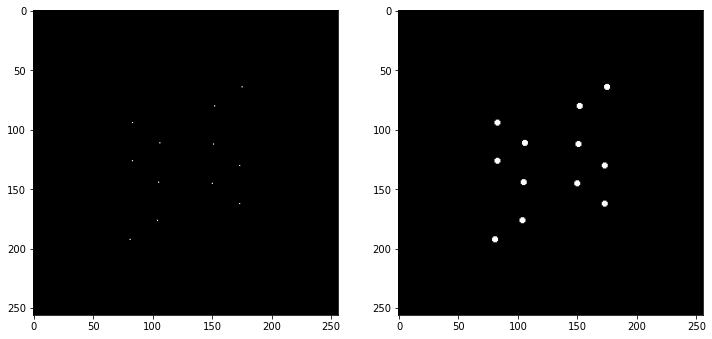

In [5]:
#Detect the peaks in experimental FFT image without logarithm
peaks = pkd.peaks_detector(exp_fft)

#Make the peaks bigger
size = 1
big_peaks = pkd.cercles(size, peaks)

#Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(121),plt.imshow(peaks, cmap='gray') #Punctual peaks
plt.subplot(122),plt.imshow(big_peaks, cmap='gray') #Circular peaks
plt.show()

# Peak detector: CNN

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs
import torch

#Import python files. They have to be in the same folder as this notebook, if not you have to add the respective filepath.
import FFT_processing as fft
import Peaks_detector as pkd
import ImageTreatment_and_interfaces as ii

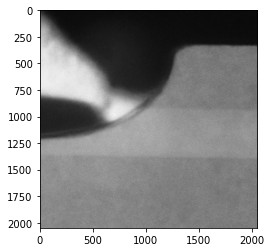

In [7]:
#Use the filepath of the sample you want to study
file_path = 'C:\\Users\\ipinto\\OneDrive - INSTITUT CATALÀ DE NANOCIENCIA I NANOTECNOLOGÍA\\PROGRAMMING\\dm3_Phases\\GeQW1.dm3'

#Charge the dm3 image
imgdm3 = hs.load(file_path)

#Convert the image in a numpy array
n_img = np.asarray(imgdm3)

#Plot the image in gray scale
plt.imshow(n_img, cmap = 'gray')
plt.show()

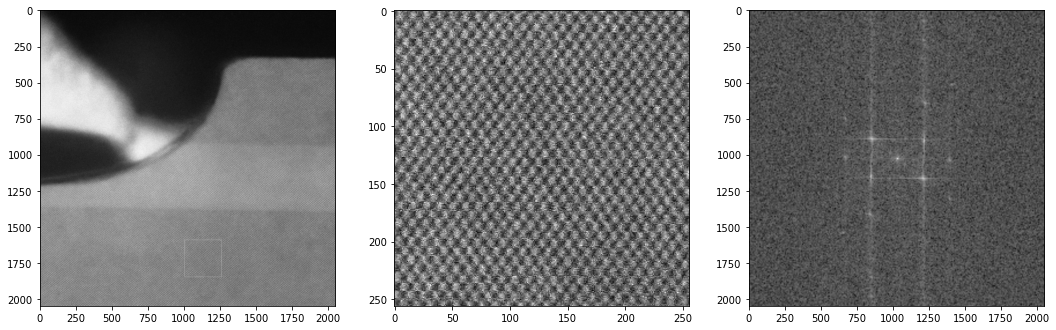

In [8]:
#Calculate experimental FFT with log using the filepath, the window size and the zone of this window
window_size = 256
zone = [1000, 200]

mark_img, reduce_image, log_fft = fft.experimental_fft_wout_log(file_path, window_size, zone)

#Plot the results
plt.figure(figsize=(18, 6))
plt.subplot(131),plt.imshow(mark_img, cmap='gray')
plt.subplot(132),plt.imshow(reduce_image, cmap='gray') #With logarithm
plt.subplot(133),plt.imshow(log_fft, cmap='gray')   #Whithout logarithm
plt.show()

Batch 1/1
1 image was decoded in approximately 3.4034 seconds


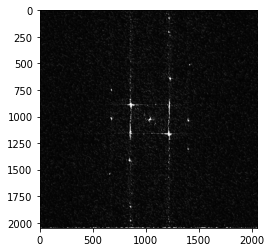

In [11]:
#Charge CNN model
dl_model = torch.load('DL2.pt')

#CNN prediction
prediction, coordinates = dl_model.predict(log_fft)

#Plot results
plt.imshow(prediction[0], cmap = 'gray')
plt.show()

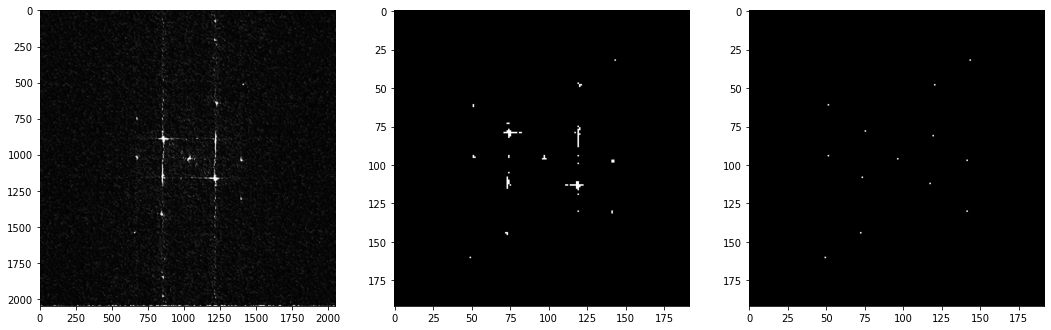

In [30]:
#Final prediction output
side = 31 #It has to be a odd number
treshold= 0.69 #It has to be less than 1

peaks,prediction_without_background = pkd.peaks_recognition(side,treshold,prediction)

#Plot the results
plt.figure(figsize=(18, 6))
plt.subplot(131),plt.imshow(prediction[0], cmap='gray')
plt.subplot(132),plt.imshow(prediction_without_background, cmap='gray') #With logarithm
plt.subplot(133),plt.imshow(peaks, cmap='gray')   #Whithout logarithm
plt.show()